# Check Libraries 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, roc_curve
)

print(" All libraries imported successfully!")


 All libraries imported successfully!


#  Import and Extract ZIP

In [9]:
import zipfile

# Define the path to your zip file
zip_path = r"C:\Users\adeed\Downloads\heart+disease.zip"
extract_path = r"C:\Users\adeed\Downloads\heart_disease_data"

# Extract contents
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(" ZIP file extracted to:", extract_path)


 ZIP file extracted to: C:\Users\adeed\Downloads\heart_disease_data


#  Check files

In [10]:
import os
import pandas as pd

# List files to check what was extracted
for file in os.listdir(extract_path):
    print(file) 


ask-detrano
bak
cleve.mod
cleveland.data
costs
heart-disease.names
hungarian.data
Index
long-beach-va.data
new.data
processed.cleveland.data
processed.hungarian.data
processed.switzerland.data
processed.va.data
reprocessed.hungarian.data
switzerland.data
WARNING


#  Load and Inspect the Data

In [11]:
import pandas as pd

# Define the path to the file
file_path = r"C:\Users\adeed\Downloads\heart_disease_data\processed.cleveland.data"

# UCI column names
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

# Load the data
df = pd.read_csv(file_path, names=columns)

# Preview the raw data
print(" Raw data preview:")
df.head()


 Raw data preview:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Clean the Data

In [12]:
import numpy as np

# Replace '?' with np.nan everywhere
df.replace('?', np.nan, inplace=True)

# Convert all columns to numeric types (force errors to NaN)
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values after conversion
df.dropna(inplace=True)

print("After cleaning, data shape:", df.shape)


After cleaning, data shape: (297, 14)


# EDA

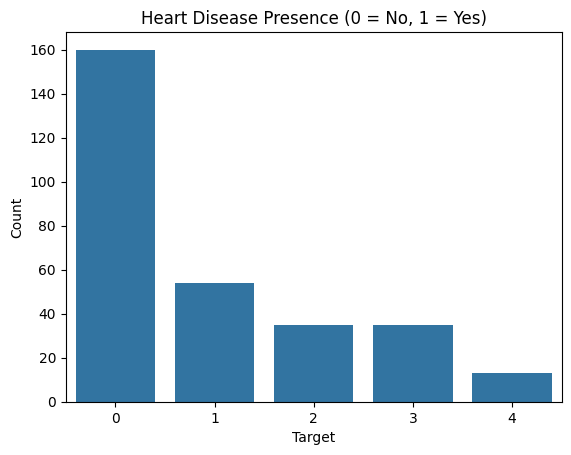

 Class Distribution (%):
 target
0    53.87
1    18.18
2    11.78
3    11.78
4     4.38
Name: proportion, dtype: float64


In [13]:
# Count of target classes
sns.countplot(data=df, x='target')
plt.title("Heart Disease Presence (0 = No, 1 = Yes)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

# Display percentages
target_percent = df['target'].value_counts(normalize=True) * 100
print(" Class Distribution (%):\n", target_percent.round(2))


#  Correlation matrix

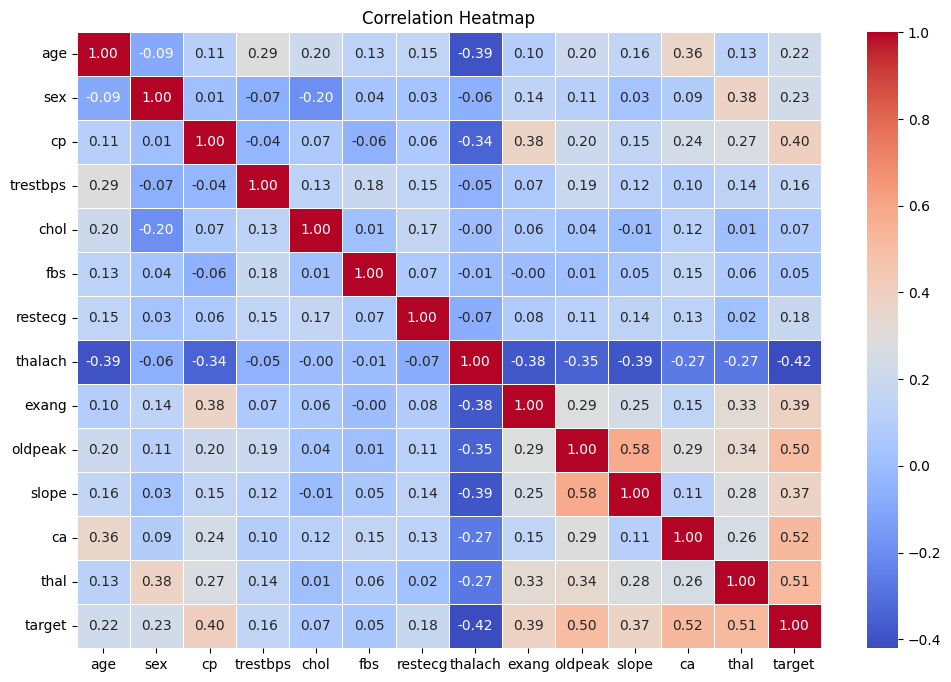

In [15]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


#  Histograms

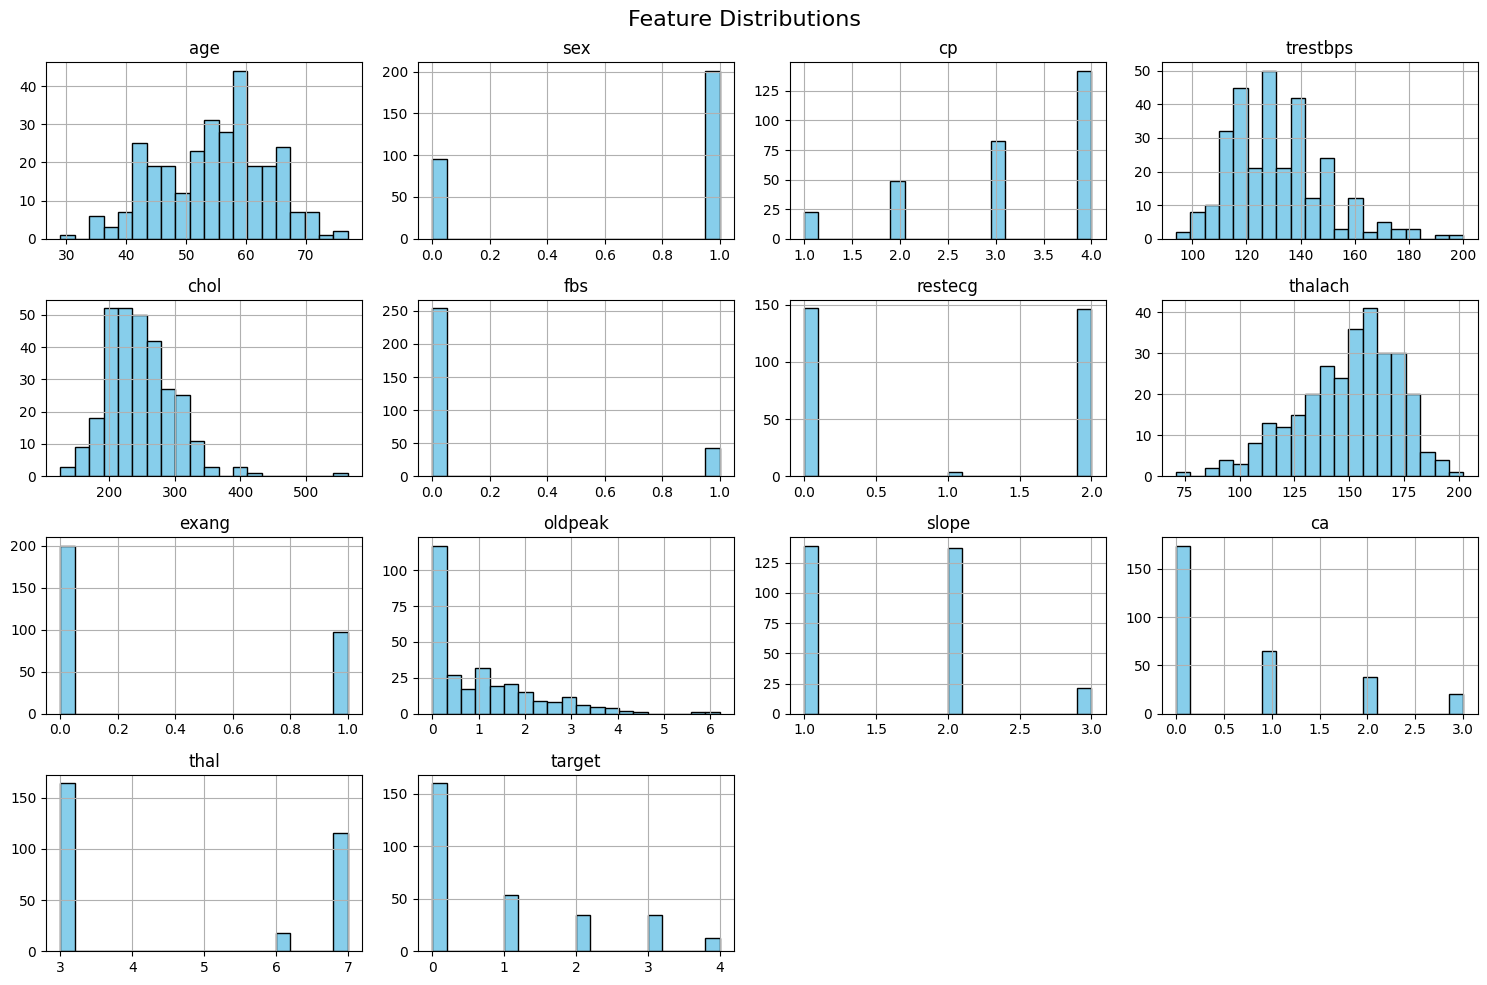

In [16]:
# Histograms for numeric features
df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


# Boxplots

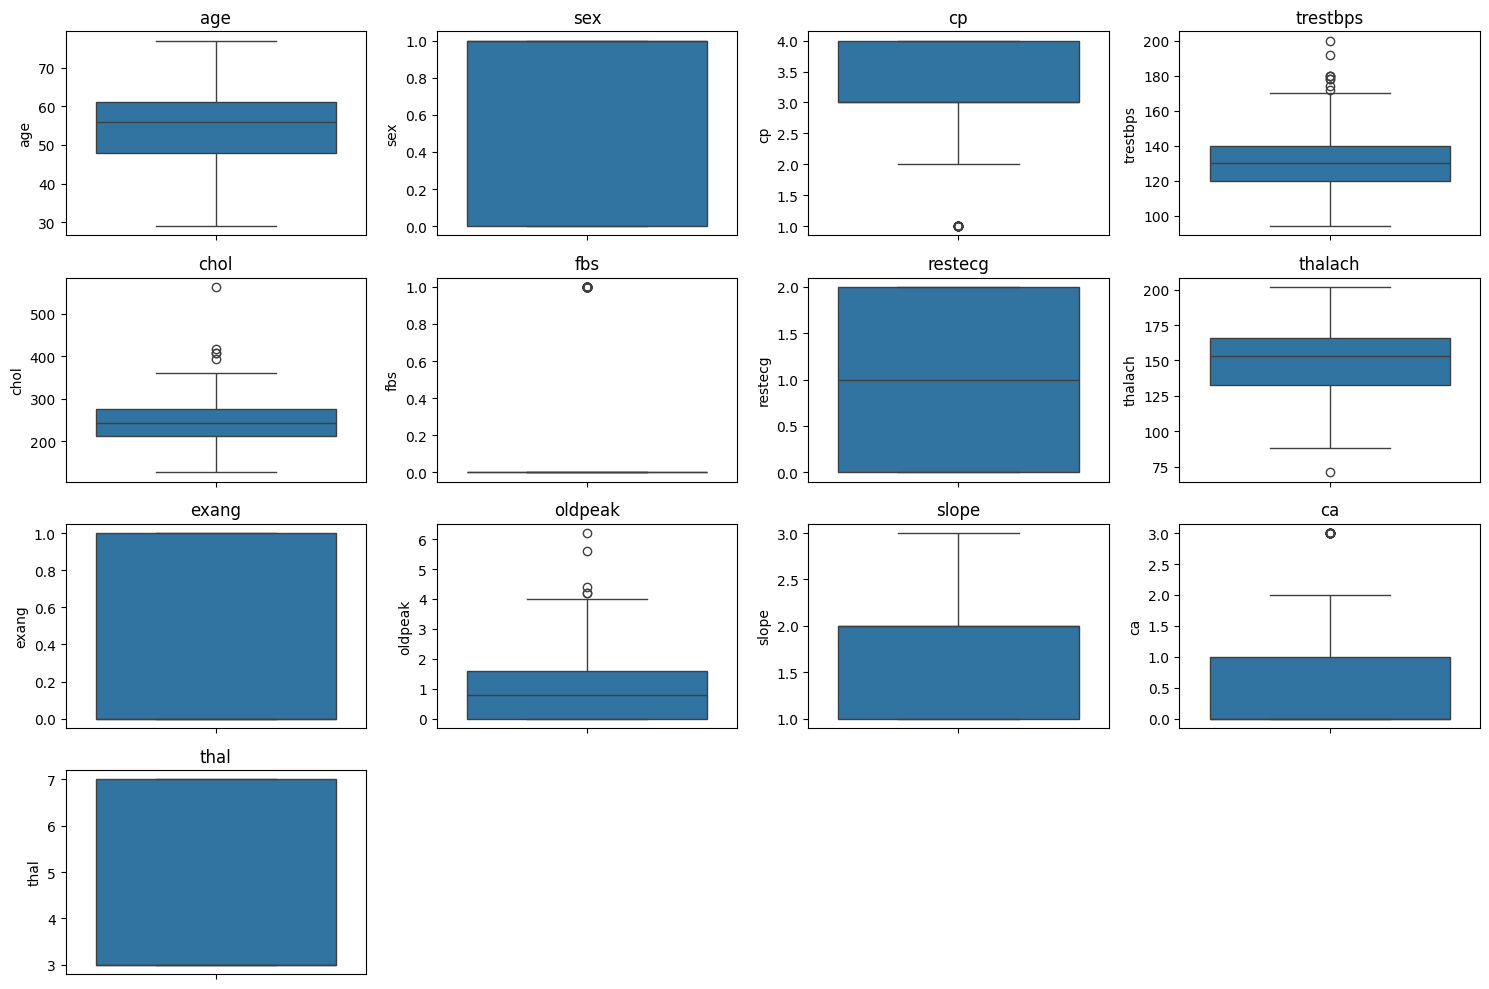

In [17]:
# Boxplots to detect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data=df, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()


# Visualization on selected features vs target

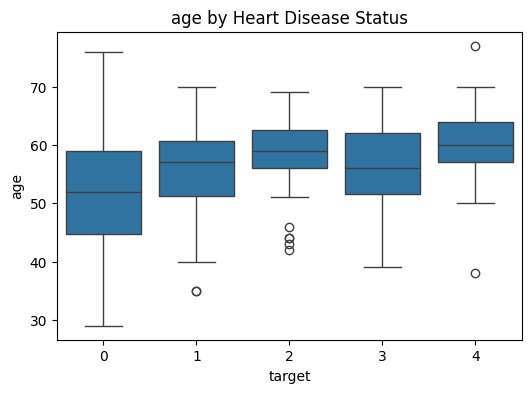

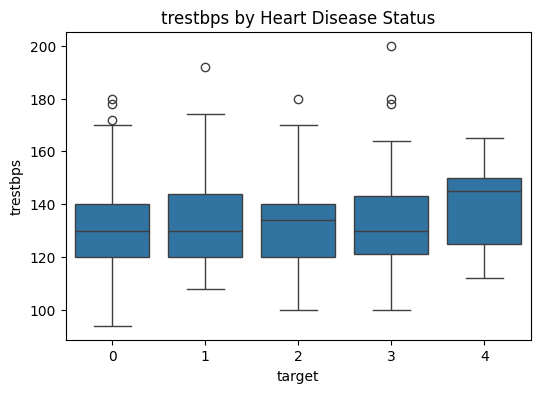

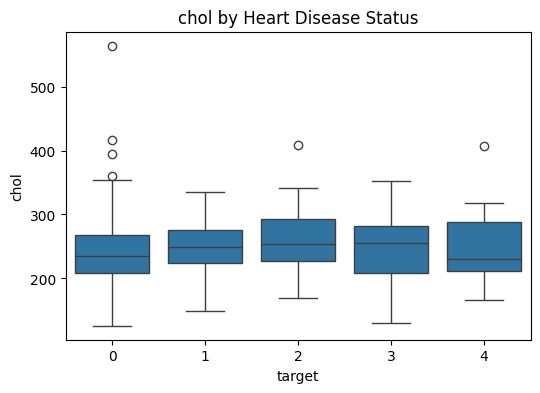

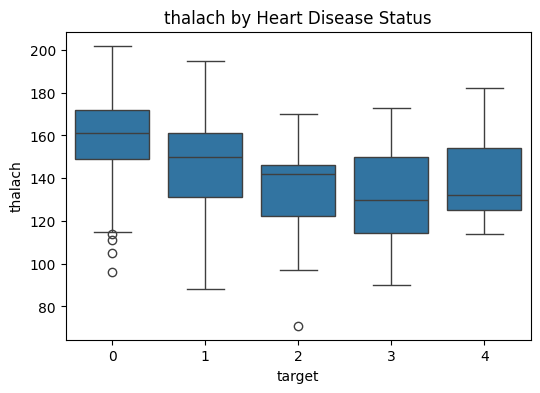

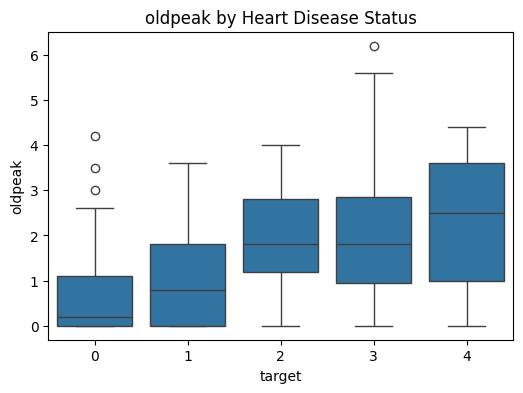

In [18]:
# Selected features vs target
features_to_plot = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col} by Heart Disease Status')
    plt.show()


# Split into Train and Test Sets

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# 1. Clean data
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

# 2. Convert target to binary
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# 3. Split features and target
X = df.drop('target', axis=1)
y = df['target']

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


#  Initialize the Models

In [20]:
# Initialize Support Vector Machine with probability enabled for AUC
svm_model = SVC(probability=True, random_state=42)

# Initialize Gradient Boosting Machine
gbm_model = GradientBoostingClassifier(random_state=42)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)


#  Train Each Model on the Training Dataset

In [26]:
# Train SVM
svm_model.fit(X_train, y_train)
print(" SVM trained.")

# Train GBM
gbm_model.fit(X_train, y_train)
print("GBM trained.")

# Train Random Forest
rf_model.fit(X_train, y_train)
print("Random Forest trained.")


 SVM trained.
GBM trained.
Random Forest trained.


# Check Training Accuracy

In [27]:
print(" Training Accuracy:")
print("SVM:", svm_model.score(X_train, y_train))
print("GBM:", gbm_model.score(X_train, y_train))
print("RF:", rf_model.score(X_train, y_train))


 Training Accuracy:
SVM: 0.6413502109704642
GBM: 0.9915611814345991
RF: 1.0


# Hyperparameter tuning 

# Grid Search for SVM

In [23]:
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(
    estimator=SVC(probability=True, random_state=42),
    param_grid=svm_params,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

svm_grid.fit(X_train, y_train)
print(" Best SVM Parameters:", svm_grid.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
✅ Best SVM Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


# Grid Search for Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_params,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)
print(" Best Random Forest Parameters:", rf_grid.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
 Best Random Forest Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


# Grid Search for Gradient Boosting (GBM)

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

gbm_grid = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=gbm_params,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

gbm_grid.fit(X_train, y_train)
print(" Best GBM Parameters:", gbm_grid.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
 Best GBM Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


# Final Models (Trained with Best Params)

In [28]:
best_svm = svm_grid.best_estimator_
best_rf = rf_grid.best_estimator_
best_gbm = gbm_grid.best_estimator_


# Define Evaluation Function

In [29]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # for AUC-ROC

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_proba)
    }


# Evaluate All Models

In [30]:
svm_results = evaluate_model(best_svm, X_test, y_test)
rf_results = evaluate_model(best_rf, X_test, y_test)
gbm_results = evaluate_model(best_gbm, X_test, y_test)
results_df = pd.DataFrame({
    "Model": ["SVM", "Random Forest", "GBM"],
    "Accuracy": [svm_results["Accuracy"], rf_results["Accuracy"], gbm_results["Accuracy"]],
    "Precision": [svm_results["Precision"], rf_results["Precision"], gbm_results["Precision"]],
    "Recall": [svm_results["Recall"], rf_results["Recall"], gbm_results["Recall"]],
    "F1 Score": [svm_results["F1 Score"], rf_results["F1 Score"], gbm_results["F1 Score"]],
    "AUC-ROC": [svm_results["AUC-ROC"], rf_results["AUC-ROC"], gbm_results["AUC-ROC"]]
})


# Summary Comparison Table

In [31]:
import pandas as pd

# Combine into a summary DataFrame
comparison_df = pd.DataFrame(
    [svm_results, rf_results, gbm_results],
    index=['SVM', 'Random Forest', 'Gradient Boosting']
)

# Round and show
print(" Model Comparison on Test Set:")
print(comparison_df.round(4))


 Model Comparison on Test Set:
                   Accuracy  Precision  Recall  F1 Score  AUC-ROC
SVM                  0.8500     0.8800  0.7857    0.8302   0.9576
Random Forest        0.8500     0.8800  0.7857    0.8302   0.9475
Gradient Boosting    0.8167     0.8696  0.7143    0.7843   0.9068


# Calculate AUC-ROC Scores

In [32]:
print("AUC-ROC Scores:")
print("SVM:", round(svm_results["AUC-ROC"], 4))
print("Random Forest:", round(rf_results["AUC-ROC"], 4))
print("Gradient Boosting:", round(gbm_results["AUC-ROC"], 4))


AUC-ROC Scores:
SVM: 0.9576
Random Forest: 0.9475
Gradient Boosting: 0.9068


# Plot ROC Curves

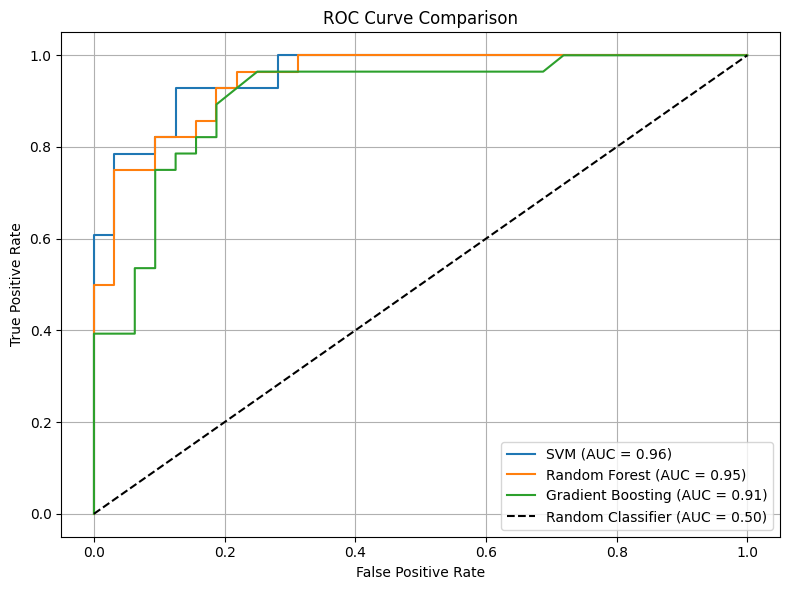

In [33]:
def plot_roc(model, X_test, y_test, label):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc:.2f})")

# Plot all three
plt.figure(figsize=(8, 6))
plot_roc(best_svm, X_test, y_test, "SVM")
plot_roc(best_rf, X_test, y_test, "Random Forest")
plot_roc(best_gbm, X_test, y_test, "Gradient Boosting")

# Plot the diagonal line (baseline)
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier (AUC = 0.50)")

# Final touches
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
